## Imports

We are using a typical data science stack: `numpy`, `pandas`, `sklearn`, `matplotlib`. 

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Read in Data 

First, we can list all the available data files. There are a total of 9 files: 1 main file for training (with target) 1 main file for testing (without the target), 1 example submission file, and 6 other files containing additional information about each loan. 

## Lire dans les données
Tout d’abord, nous pouvons lister tous les fichiers de données disponibles. Il y a au total 9 fichiers : 1 fichier principal pour la formation (avec cible), 1 fichier principal pour les tests (sans la cible), 1 exemple de fichier de soumission et 6 autres fichiers contenant des informations supplémentaires sur chaque prêt.

In [11]:
# List files available
print(os.listdir("data"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'Projet+Mise+en+prod+-+home-credit-default-risk.zip', 'sample_submission.csv']


In [3]:
# Training data
app_train = pd.read_csv('data/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


The training data has 307511 observations (each one a separate loan) and 122 features (variables) including the `TARGET` (the label we want to predict).

Les données d'entraînement contiennent 307 511 observations (chacune étant un emprunt distinct) et 122 caractéristiques (variables), y compris le « TARGET » (l'étiquette que nous voulons prédire).

In [12]:
# Testing data features
app_test = pd.read_csv('data/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


The test set is considerably smaller and lacks a `TARGET` column. 

L'ensemble de test est considérablement plus petit et n'a pas de colonne « TARGET ».

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data. The goal of EDA is to learn what our data can tell us. It generally starts out with a high level overview, then narrows in to specific areas as we find intriguing areas of the data. The findings may be interesting in their own right, or they can be used to inform our modeling choices, such as by helping us decide which features to use.
# L'analyse exploratoire des données

L'analyse exploratoire des données (EDA) est un processus ouvert dans lequel nous calculons des statistiques et réalisons des chiffres pour trouver des tendances, des anomalies, des modèles ou des relations au sein des données. L’objectif de l’EDA est d’apprendre ce que nos données peuvent nous dire. Cela commence généralement par un aperçu de haut niveau, puis se concentre sur des domaines spécifiques à mesure que nous trouvons des domaines de données intrigants. Les résultats peuvent être intéressants en eux-mêmes, ou ils peuvent être utilisés pour éclairer nos choix de modélisation, par exemple en nous aidant à décider quelles fonctionnalités utiliser.

## Examine the Distribution of the Target Column

The target is what we are asked to predict: either a 0 for the loan was repaid on time, or a 1 indicating the client had payment difficulties. We can first examine the number of loans falling into each category.

## Examiner la distribution de la colonne cible

L'objectif est ce qu'on nous demande de prédire : soit un 0 pour le prêt remboursé à temps, soit un 1 indiquant que le client a eu des difficultés de paiement. Nous pouvons d’abord examiner le nombre de prêts entrant dans chaque catégorie.

In [13]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

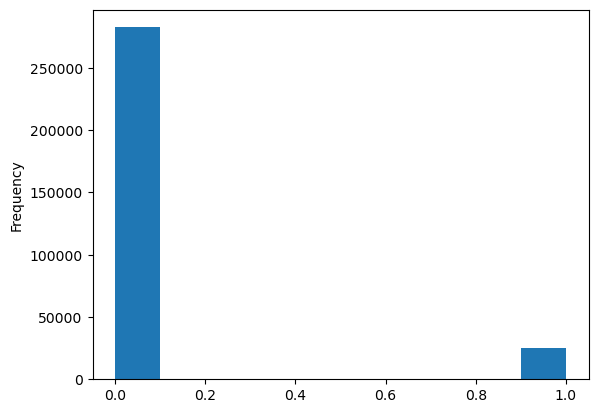

In [14]:
app_train['TARGET'].astype(int).plot.hist();

From this information, we see this is an [_imbalanced class problem_](http://www.chioka.in/class-imbalance-problem/). There are far more loans that were repaid on time than loans that were not repaid. Once we get into more sophisticated machine learning models, we can [weight the classes](http://xgboost.readthedocs.io/en/latest/parameter.html) by their representation in the data to reflect this imbalance. 

## Examine Missing Values

Next we can look at the number and percentage of missing values in each column. 

In [15]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [16]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation). In later work, we will use models such as XGBoost that can [handle missing values with no need for imputation](https://stats.stackexchange.com/questions/235489/xgboost-can-handle-missing-data-in-the-forecasting-phase). Another option would be to drop columns with a high percentage of missing values, although it is impossible to know ahead of time if these columns will be helpful to our model. Therefore, we will keep all of the columns for now.

## Column Types

Let's look at the number of columns of each data type. `int64` and `float64` are numeric variables ([which can be either discrete or continuous](https://stats.stackexchange.com/questions/206/what-is-the-difference-between-discrete-data-and-continuous-data)). `object` columns contain strings and are  [categorical features.](http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/what-are-categorical-discrete-and-continuous-variables/) . 

In [17]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Let's now look at the number of unique entries in each of the `object` (categorical) columns.

In [18]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Most of the categorical variables have a relatively small number of unique entries. We will need to find a way to deal with these categorical variables! 

## Encoding Categorical Variables

Before we go any further, we need to deal with pesky categorical variables.  A machine learning model unfortunately cannot deal with categorical variables (except for some models such as [LightGBM](http://lightgbm.readthedocs.io/en/latest/Features.html)). Therefore, we have to find a way to encode (represent) these variables as numbers before handing them off to the model. There are two main ways to carry out this process:

* Label encoding: assign each unique category in a categorical variable with an integer. No new columns are created. An example is shown below

![image](https://raw.githubusercontent.com/WillKoehrsen/Machine-Learning-Projects/master/label_encoding.png)

* One-hot encoding: create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns. 

![image](https://raw.githubusercontent.com/WillKoehrsen/Machine-Learning-Projects/master/one_hot_encoding.png)

The problem with label encoding is that it gives the categories an arbitrary ordering. The value assigned to each of the categories is random and does not reflect any inherent aspect of the category. In the example above, programmer recieves a 4 and data scientist a 1, but if we did the same process again, the labels could be reversed or completely different. The actual assignment of the integers is arbitrary. Therefore, when we perform label encoding, the model might use the relative value of the feature (for example programmer = 4 and data scientist = 1) to assign weights which is not what we want. If we only have two unique values for a categorical variable (such as Male/Female), then label encoding is fine, but for more than 2 unique categories, one-hot encoding is the safe option.

There is some debate about the relative merits of these approaches, and some models can deal with label encoded categorical variables with no issues. [Here is a good Stack Overflow discussion](https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor). I think (and this is just a personal opinion) for categorical variables with many classes, one-hot encoding is the safest approach because it does not impose arbitrary values to categories. The only downside to one-hot encoding is that the number of features (dimensions of the data) can explode with categorical variables with many categories. To deal with this, we can perform one-hot encoding followed by [PCA](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf) or other [dimensionality reduction methods](https://www.analyticsvidhya.com/blog/2015/07/dimension-reduction-methods/) to reduce the number of dimensions (while still trying to preserve information). 

In this notebook, we will use Label Encoding for any categorical variables with only 2 categories and One-Hot Encoding for any categorical variables with more than 2 categories. This process may need to change as we get further into the project, but for now, we will see where this gets us. (We will also not use any dimensionality reduction in this notebook but will explore in future iterations).

### Label Encoding and One-Hot Encoding

Let's implement the policy described above: for any categorical variable (`dtype == object`) with 2 unique categories, we will use label encoding, and for any categorical variable with more than 2 unique categories, we will use one-hot encoding. 

For label encoding, we use the Scikit-Learn `LabelEncoder` and for one-hot encoding, the pandas `get_dummies(df)` function.

In [19]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [20]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)


Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


### Aligning Training and Testing Data

There need to be the same features (columns) in both the training and testing data. One-hot encoding has created more columns in the training data because there were some categorical variables with categories not represented in the testing data. To remove the columns in the training data that are not in the testing data, we need to `align` the dataframes. First we extract the target column from the training data (because this is not in the testing data but we need to keep this information). When we do the align, we must make sure to set `axis = 1` to align the dataframes based on the columns and not on the rows!

In [21]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


The training and testing datasets now have the same features which is required for machine learning. The number of features has grown significantly due to one-hot encoding. At some point we probably will want to try [dimensionality reduction (removing features that are not relevant)](https://en.wikipedia.org/wiki/Dimensionality_reduction) to reduce the size of the datasets.

## Back to Exploratory Data Analysis

### Anomalies

One problem we always want to be on the lookout for when doing EDA is anomalies within the data. These may be due to mis-typed numbers, errors in measuring equipment, or they could be valid but extreme measurements. One way to support anomalies quantitatively is by looking at the statistics of a column using the `describe` method. The numbers in the `DAYS_BIRTH` column are negative because they are recorded relative to the current loan application. To see these stats in years, we can mutliple by -1 and divide by the number of days in a year:



In [22]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Those ages look reasonable. There are no outliers for the age on either the high or low end. How about the days of employment? 

In [23]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

That doesn't look right! The maximum value (besides being positive) is about 1000 years! 

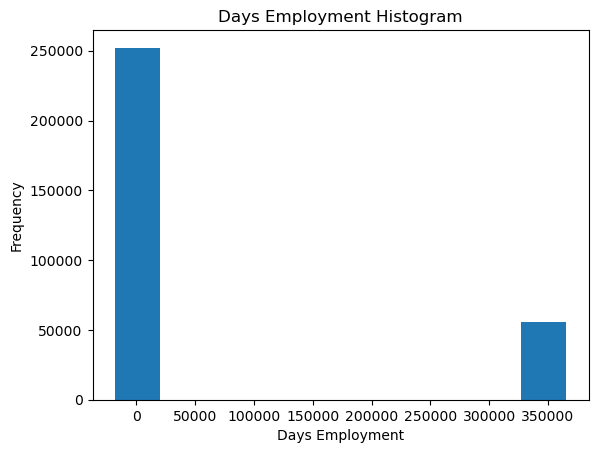

In [24]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

Just out of curiousity, let's subset the anomalous clients and see if they tend to have higher or low rates of default than the rest of the clients.

In [25]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Well that is extremely interesting! It turns out that the anomalies have a lower rate of default. 

Handling the anomalies depends on the exact situation, with no set rules. One of the safest approaches is just to set the anomalies to a missing value and then have them filled in (using Imputation) before machine learning. In this case, since all the anomalies have the exact same value, we want to fill them in with the same value in case all of these loans share something in common. The anomalous values seem to have some importance, so we want to tell the machine learning model if we did in fact fill in these values. As a solution, we will fill in the anomalous values with not a number (`np.nan`) and then create a new boolean column indicating whether or not the value was anomalous.



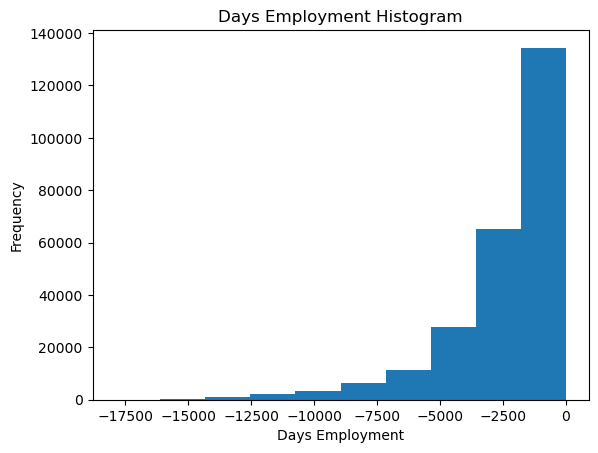

In [26]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

The distribution looks to be much more in line with what we would expect, and we also have created a new column to tell the model that these values were originally anomalous (becuase we will have to fill in the nans with some value, probably the median of the column). The other columns with `DAYS` in the dataframe look to be about what we expect with no obvious outliers. 

As an extremely important note, anything we do to the training data we also have to do to the testing data. Let's make sure to create the new column and fill in the existing column with `np.nan` in the testing data.

In [27]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


### Correlations

Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the `.corr` dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some [general interpretations of the absolute value of the correlation coefficent](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf) are:


* .00-.19 “very weak”
*  .20-.39 “weak”
*  .40-.59 “moderate”
*  .60-.79 “strong”
* .80-1.0 “very strong”


In [28]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

Let's take a look at some of more significant correlations: the `DAYS_BIRTH` is the most positive correlation. (except for `TARGET` because the correlation of a variable with itself is always 1!) Looking at the documentation, `DAYS_BIRTH` is the age in days of the client at the time of the loan in negative days (for whatever reason!). The correlation is positive, but the value of this feature is actually negative, meaning that as the client gets older, they are less likely to default on their loan (ie the target == 0). That's a little confusing, so we will take the absolute value of the feature and then the correlation will be negative.

### Effect of Age on Repayment

In [29]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

As the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often. 

Let's start looking at this variable. First, we can make a histogram of the age. We will put the x axis in years to make the plot a little more understandable.

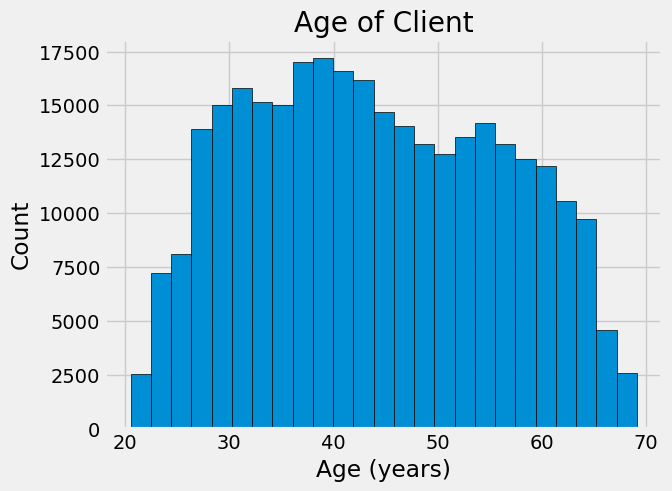

In [30]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

By itself, the distribution of age does not tell us much other than that there are no outliers as all the ages are reasonable. To visualize the effect of the age on the target, we will next make a [kernel density estimation plot](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE) colored by the value of the target. A [kernel density estimate plot shows the distribution of a single variable](https://chemicalstatistician.wordpress.com/2013/06/09/exploratory-data-analysis-kernel-density-estimation-in-r-on-ozone-pollution-data-in-new-york-and-ozonopolis/) and can be thought of as a smoothed histogram (it is created by computing a kernel, usually a Gaussian, at each data point and then averaging all the individual kernels to develop a single smooth curve). We will use the seaborn `kdeplot` for this graph.

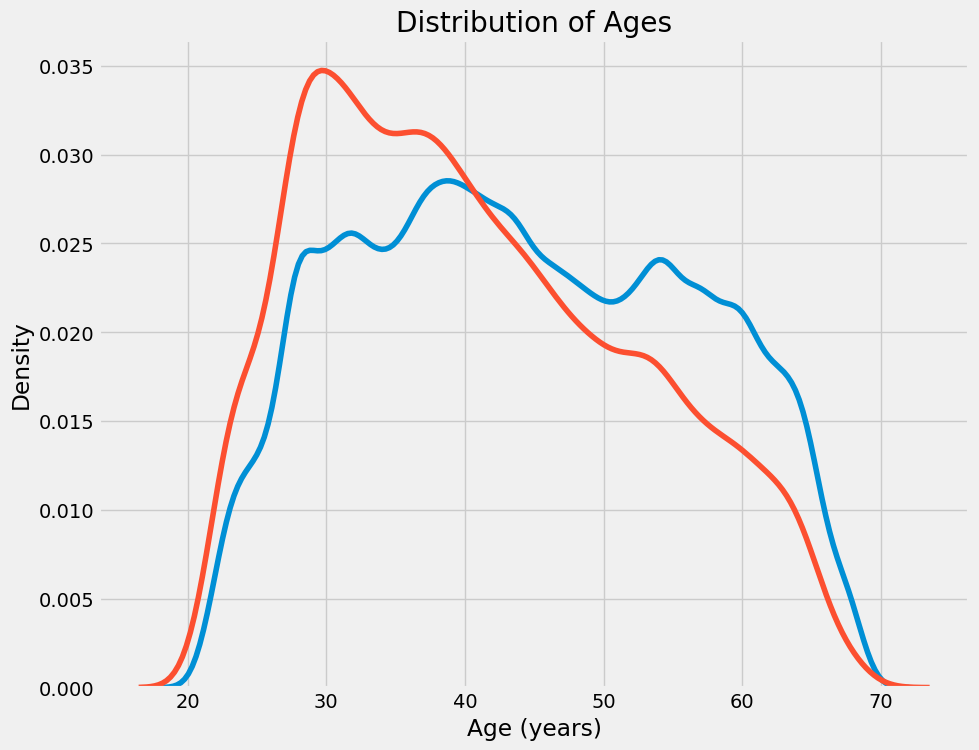

In [31]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

The target == 1 curve skews towards the younger end of the range. Although this is not a significant correlation (-0.07 correlation coefficient), this variable is likely going to be useful in a machine learning model because it does affect the target. Let's look at this relationship in another way: average failure to repay loans by age bracket. 

To make this graph, first we `cut` the age category into bins of 5 years each. Then, for each bin, we calculate the average value of the target, which tells us the ratio of loans that were not repaid in each age category.

In [32]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [33]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


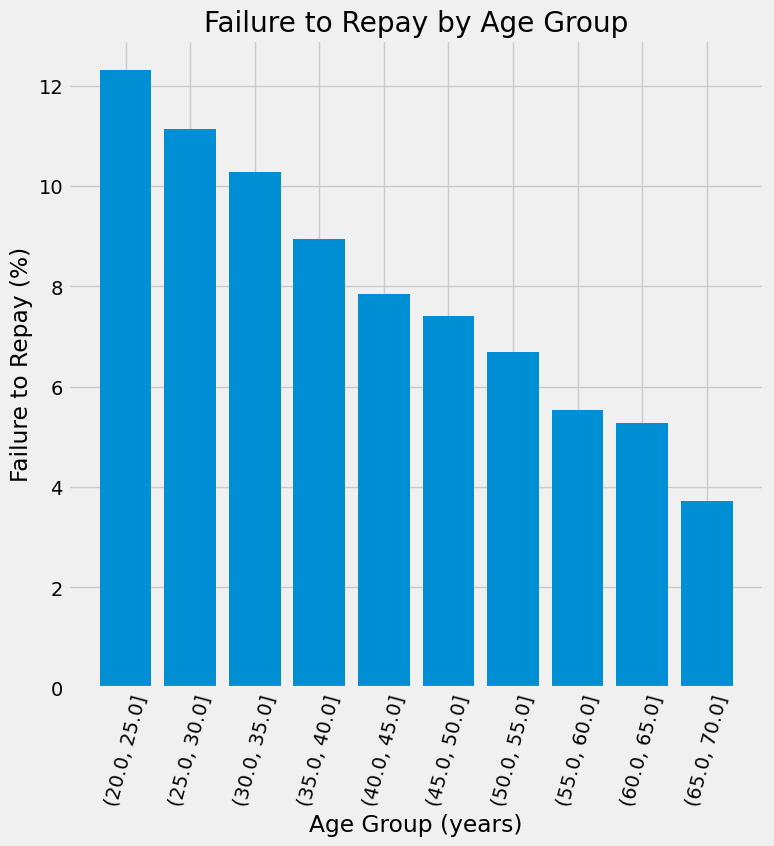

In [34]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

There is a clear trend: younger applicants are more likely to not repay the loan! The rate of failure to repay is above 10% for the youngest three age groups and beolow 5% for the oldest age group.

This is information that could be directly used by the bank: because younger clients are less likely to repay the loan, maybe they should be provided with more guidance or financial planning tips. This does not mean the bank should discriminate against younger clients, but it would be smart to take precautionary measures to help younger clients pay on time.

### Exterior Sources

The 3 variables with the strongest negative correlations with the target are `EXT_SOURCE_1`, `EXT_SOURCE_2`, and `EXT_SOURCE_3`.
According to the documentation, these features represent a "normalized score from external data source". I'm not sure what this exactly means, but it may be a cumulative sort of credit rating made using numerous sources of data. 

Let's take a look at these variables.

First, we can show the correlations of the `EXT_SOURCE` features with the target and with each other.

In [35]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


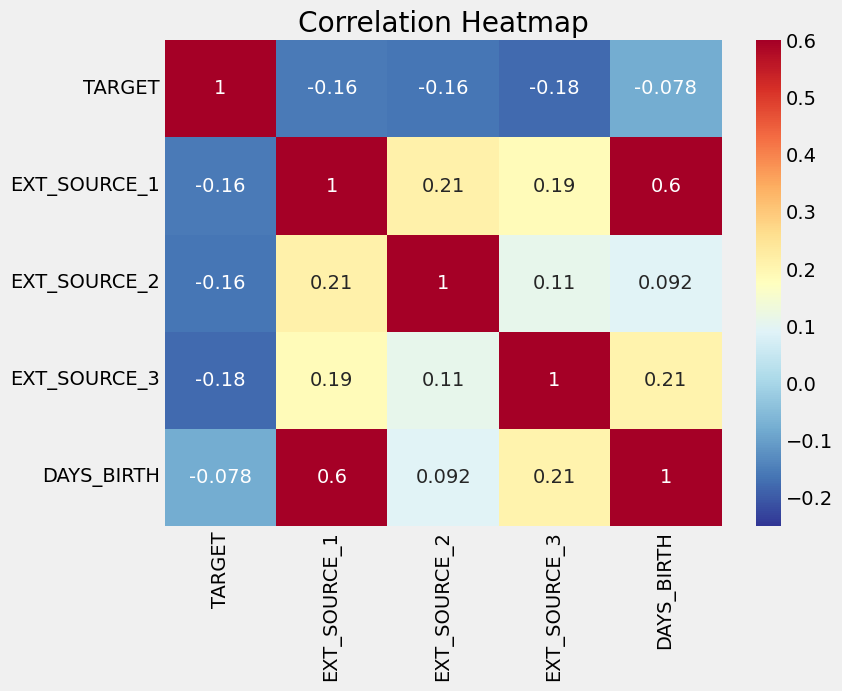

In [36]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

All three `EXT_SOURCE` featureshave negative correlations with the target, indicating that as the value of the `EXT_SOURCE` increases, the client is more likely to repay the loan. We can also see that `DAYS_BIRTH` is positively correlated with `EXT_SOURCE_1` indicating that maybe one of the factors in this score is the client age.

Next we can look at the distribution of each of these features colored by the value of the target. This will let us visualize the effect of this variable on the target.

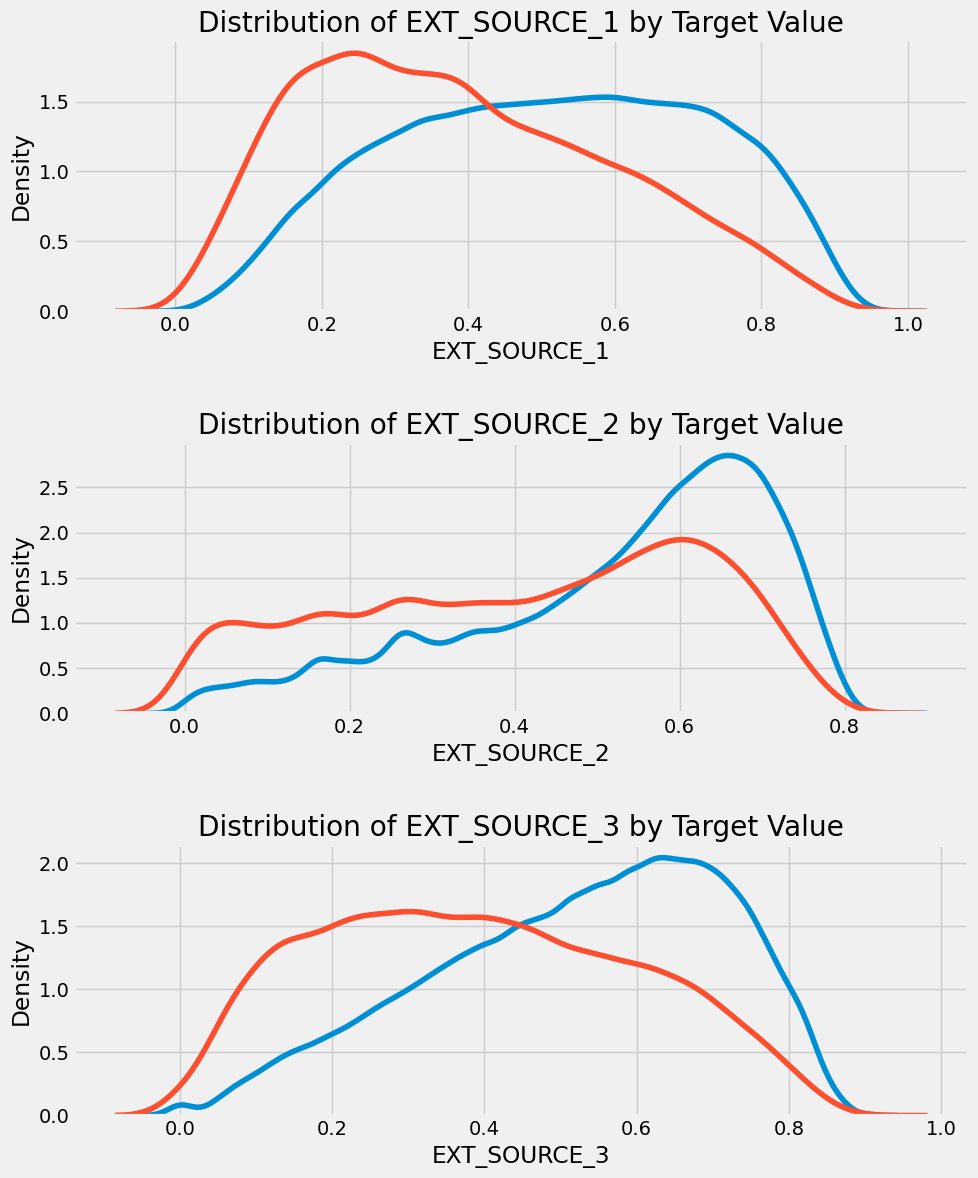

In [37]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)
    

`EXT_SOURCE_3` displays the greatest difference between the values of the target. We can clearly see that this feature has some relationship to the likelihood of an applicant to repay a loan. The relationship is not very strong (in fact they are all [considered very weak](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf), but these variables will still be useful for a machine learning model to predict whether or not an applicant will repay a loan on time.

## Pairs Plot

As a final exploratory plot, we can make a pairs plot of the `EXT_SOURCE` variables and the `DAYS_BIRTH` variable. The [Pairs Plot](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166) is a great exploration tool because it lets us see relationships between multiple pairs of variables as well as distributions of single variables. Here we are using the seaborn visualization library and the PairGrid function to create a Pairs Plot with scatterplots on the upper triangle, histograms on the diagonal, and 2D kernel density plots and correlation coefficients on the lower triangle.

If you don't understand this code, that's all right! Plotting in Python can be overly complex, and for anything beyond the simplest graphs, I usually find an existing implementation and adapt the code (don't repeat yourself)! 

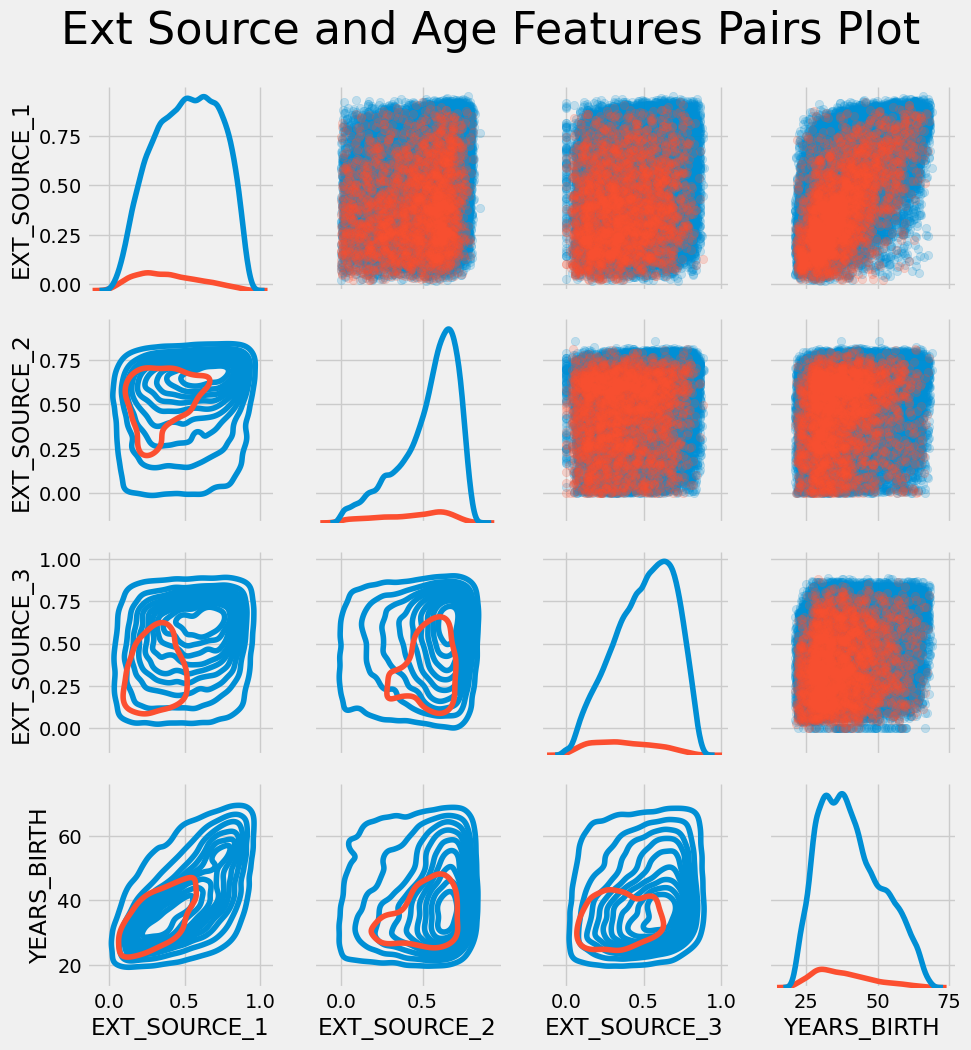

In [40]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

In this plot, the red indicates loans that were not repaid and the blue are loans that are paid. We can see the different relationships within the data. There does appear to be a moderate positive linear relationship between the `EXT_SOURCE_1` and the `DAYS_BIRTH` (or equivalently `YEARS_BIRTH`), indicating that this feature may take into account the age of the client. 

# Feature Engineering

Kaggle competitions are won by feature engineering: those win are those who can create the most useful features out of the data. (This is true for the most part as the winning models, at least for structured data, all tend to be variants on [gradient boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)). This represents one of the patterns in machine learning: feature engineering has a greater return on investment than model building and hyperparameter tuning. [This is a great article on the subject)](https://www.featurelabs.com/blog/secret-to-data-science-success/). As Andrew Ng is fond of saying: "applied machine learning is basically feature engineering." 

While choosing the right model and optimal settings are important, the model can only learn from the data it is given. Making sure this data is as relevant to the task as possible is the job of the data scientist (and maybe some [automated tools](https://docs.featuretools.com/getting_started/install.html) to help us out).

Feature engineering refers to a geneal process and can involve both feature construction: adding new features from the existing data, and feature selection: choosing only the most important features or other methods of dimensionality reduction. There are many techniques we can use to both create features and select features.

We will do a lot of feature engineering when we start using the other data sources, but in this notebook we will try only two simple feature construction methods: 

* Polynomial features
* Domain knowledge features


## Polynomial Features

One simple feature construction method is called [polynomial features](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). In this method, we make features that are powers of existing features as well as interaction terms between existing features. For example, we can create variables `EXT_SOURCE_1^2` and `EXT_SOURCE_2^2` and also variables such as `EXT_SOURCE_1` x `EXT_SOURCE_2`, `EXT_SOURCE_1` x `EXT_SOURCE_2^2`, `EXT_SOURCE_1^2` x   `EXT_SOURCE_2^2`, and so on. These features that are a combination of multiple individual variables are called [interaction terms](https://en.wikipedia.org/wiki/Interaction_(statistics) because they  capture the interactions between variables. In other words, while two variables by themselves  may not have a strong influence on the target, combining them together into a single interaction variable might show a relationship with the target. [Interaction terms are commonly used in statistical models](https://www.theanalysisfactor.com/interpreting-interactions-in-regression/) to capture the effects of multiple variables, but I do not see them used as often in machine learning. Nonetheless, we can try out a few to see if they might help our model to predict whether or not a client will repay a loan. 

Jake VanderPlas writes about [polynomial features in his excellent book Python for Data Science](https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html) for those who want more information.

In the following code, we create polynomial features using the `EXT_SOURCE` variables and the `DAYS_BIRTH` variable. [Scikit-Learn has a useful class called `PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) that creates the polynomials and the interaction terms up to a specified degree. We can use a degree of 3 to see the results (when we are creating polynomial features, we want to avoid using too high of a degree, both because the number of features scales exponentially with the degree, and because we can run into [problems with overfitting](http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py)). 

In [41]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [42]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


This creates a considerable number of new features. To get the names we have to use the polynomial features `get_feature_names` method.

In [44]:
poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

array(['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2',
       'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2'], dtype=object)

There are 35 features with individual features raised to powers up to degree 3 and interaction terms. Now, we can see whether any of these new features are correlated with the target.

In [46]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


Several of the new variables have a greater (in terms of absolute magnitude) correlation with the target than the original features. When we build machine learning models, we can try with and without these features to determine if they actually help the model learn. 

We will add these features to a copy of the training and testing data and then evaluate models with and without the features. Many times in machine learning, the only way to know if an approach will work is to try it out! 

In [48]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


## Domain Knowledge Features

Maybe it's not entirely correct to call this "domain knowledge" because I'm not a credit expert, but perhaps we could call this "attempts at applying limited financial knowledge". In this frame of mind, we can make a couple features that attempt to capture what we think may be important for telling whether a client will default on a loan. Here I'm going to use five features that were inspired by [this script](https://www.kaggle.com/jsaguiar/updated-0-792-lb-lightgbm-with-simple-features) by Aguiar:

* `CREDIT_INCOME_PERCENT`: the percentage of the credit amount relative to a client's income
* `ANNUITY_INCOME_PERCENT`: the percentage of the loan annuity relative to a client's income
* `CREDIT_TERM`:  the length of the payment in months (since the annuity is the monthly amount due
* `DAYS_EMPLOYED_PERCENT`: the percentage of the days employed relative to the client's age

Again, thanks to Aguiar and [his great script](https://www.kaggle.com/jsaguiar/updated-0-792-lb-lightgbm-with-simple-features) for exploring these features.



In [49]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [50]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

#### Visualize New Variables

We should explore these __domain knowledge__ variables visually in a graph. For all of these, we will make the same KDE plot colored by the value of the `TARGET`.

It's hard to say ahead of time if these new features will be useful. The only way to tell for sure is to try them out! 

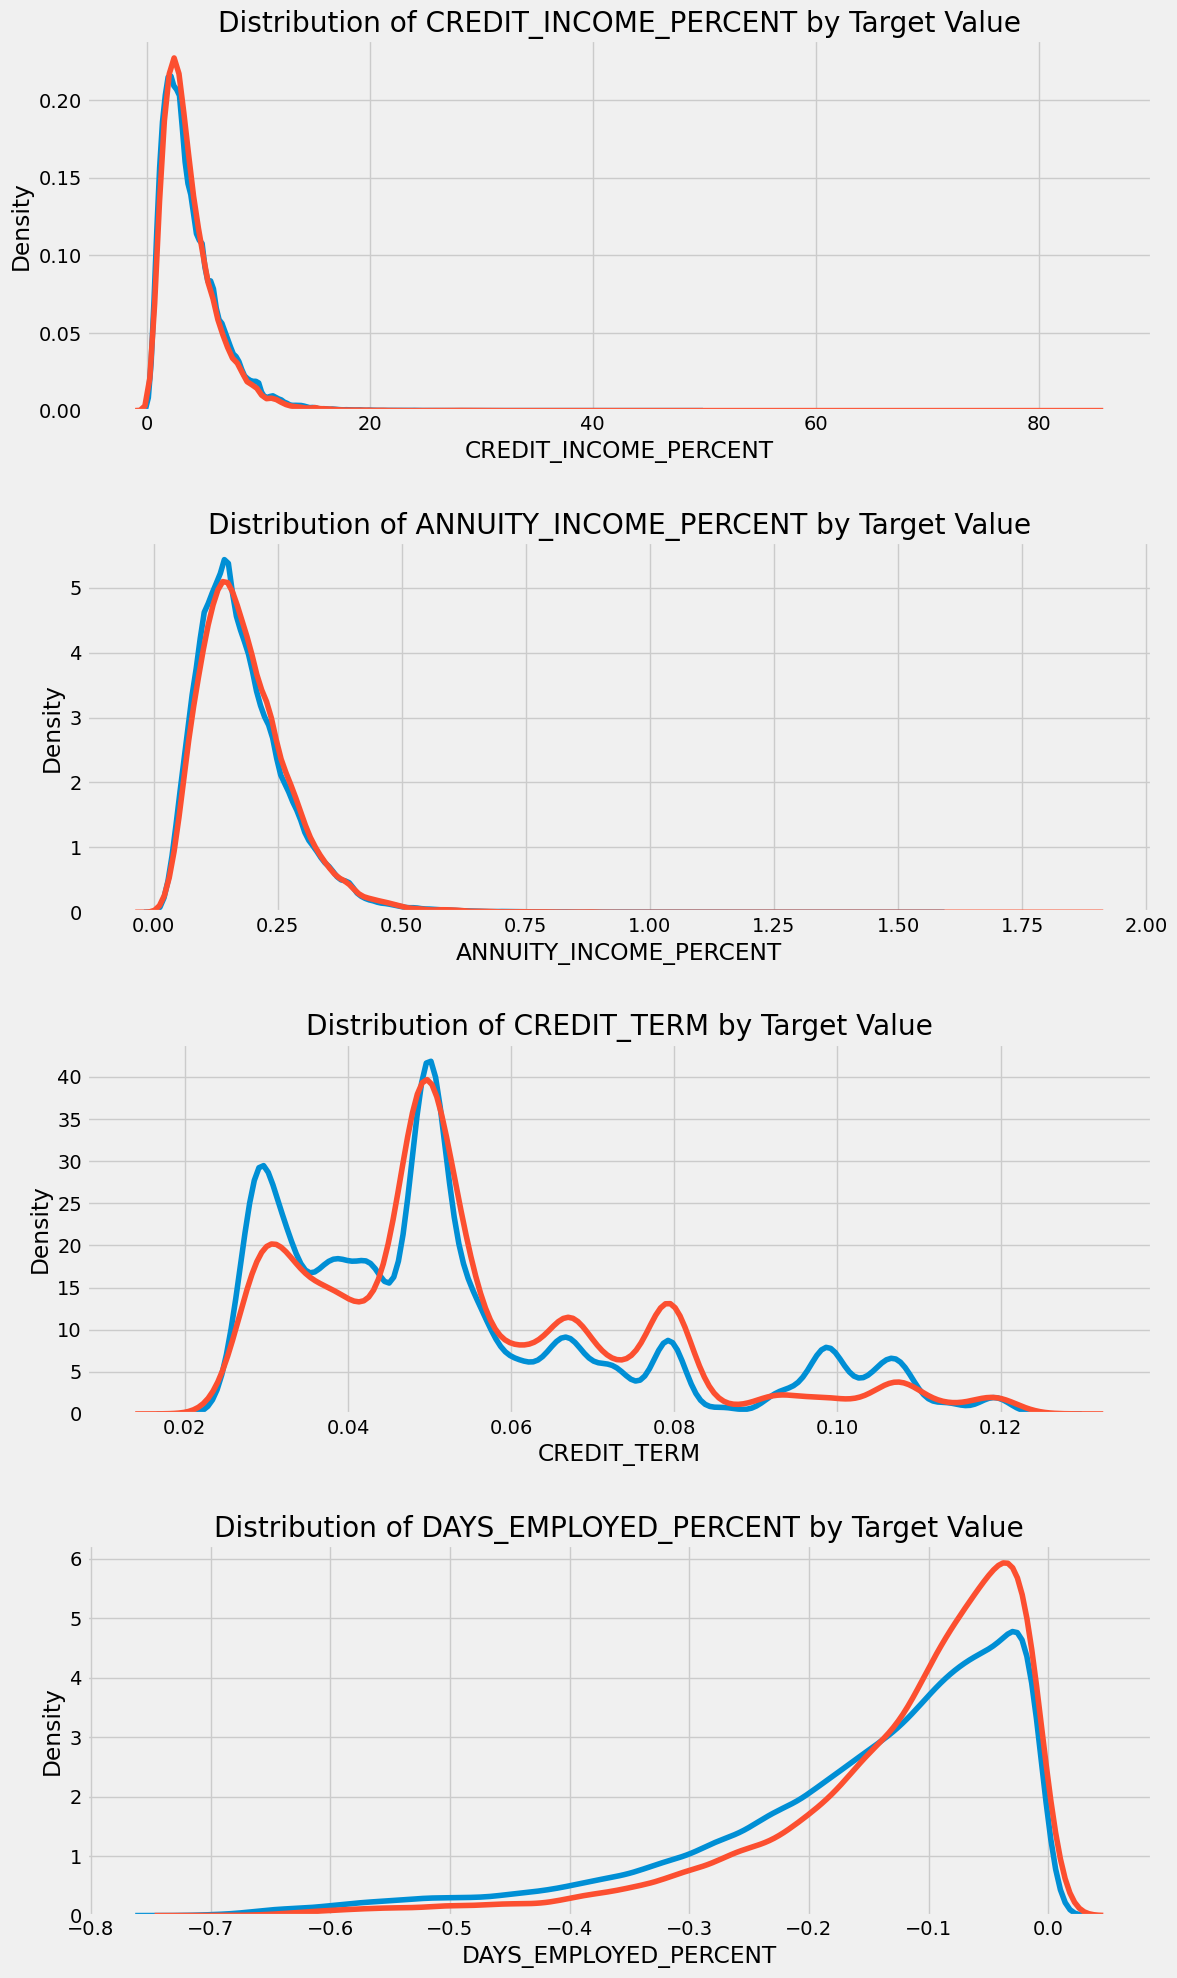

In [51]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

# Baseline

For a naive baseline, we could guess the same value for all examples on the testing set.  We are asked to predict the probability of not repaying the loan, so if we are entirely unsure, we would guess 0.5 for all observations on the test set. This  will get us a Reciever Operating Characteristic Area Under the Curve (AUC ROC) of 0.5 in the competition ([random guessing on a classification task will score a 0.5](https://stats.stackexchange.com/questions/266387/can-auc-roc-be-between-0-0-5)).

Since we already know what score we are going to get, we don't really need to make a naive baseline guess. Let's use a slightly more sophisticated model for our actual baseline: Logistic Regression.

### Logistic Regression Implementation

Here I will focus on implementing the model rather than explaining the details, but for those who want to learn more about the theory of machine learning algorithms, I recommend both [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) and [Hands-On Machine Learning with Scikit-Learn and TensorFlow](http://shop.oreilly.com/product/0636920052289.do). Both of these books present the theory and also the code needed to make the models (in R and Python respectively). They both teach with the mindset that the best way to learn is by doing, and they are very effective! 

To get a baseline, we will use all of the features after encoding the categorical variables. We will preprocess the data by filling in the missing values (imputation) and normalizing the range of the features (feature scaling). The following code performs both of these preprocessing steps.

In [52]:
def display_scree_plot(acp):
    scree = acp.explained_variance_ratio_*100
    #print(scree)
    #print("Le premier plan factoriel représente {} % de la variance totale.".format(round(scree[0] + scree[1],2)))
    #print("Le deuxième plan factoriel représente {} % de la variance totale.".format(round(scree[2] + scree[3],2)))
    #print("Le troisième plan factoriel représente {} % de la variance totale.".format(round(scree[4] + scree[5],2)))
    plt.figure(figsize=(8, 8))
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

In [53]:
def application_pca(df, taux=0.9):
    
    #n_comp = 40
    pca = PCA(taux)

    X_pca =  pd.DataFrame(pca.fit_transform(df))

    #On appelle la fonction qui trace la courbe des éboulis des valeurs propres
    display_scree_plot(pca)

    return X_pca

In [54]:
def preprocesseur(df_train, df_test):
    
    # Drop the target from the training data
    if "TARGET" in df_train:
        train = df_train.drop(columns = ["TARGET"])
    else:
        train = df_train.copy()
        
    # Feature names
    features = list(train.columns)


    # Median imputation of missing values
    imputer = SimpleImputer(strategy = 'median')

    # Scale each feature to 0-1
    scaler = MinMaxScaler(feature_range = (0, 1))

    # Replace the boolean column by numerics values 
    train["DAYS_EMPLOYED_ANOM"] = train["DAYS_EMPLOYED_ANOM"].astype("int")

    # Fit on the training data
    imputer.fit(train)

    # Transform both training and testing data
    train = imputer.transform(train)
    test = imputer.transform(df_test)

    # Repeat with the scaler
    scaler.fit(train)
    train = scaler.transform(train)
    test = scaler.transform(test)
    
    return train, test

In [55]:
def echantillonage(df_X, df_y):

    X = df_X.copy()
    y = df_y.copy()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    return X_train, X_test, y_train, y_test

Avant de construire notre baseline, nous allons effectuer le preprocessing des données qui se compose en 3 fonctions :

 - Echantillonage : Pour séparer notre dataset en 2 parties. Nous garderons les données de tests de côté afin d'être sûr que les modèles ne les voient pas dans une phase d'entraînement.
 
 - Preprocesseur : Qui contient l'imputer, et le scaler.
 - PCA : Pour effectuer une réduction dimensionnelle.


## Preprocessing + Echantillonage des données

Nous allons réaliser nos trois processings suivis des échantillonages correspondant à nos trois hypothèses de features engineering.

In [56]:
%%time

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

app_train.drop(columns="SK_ID_CURR", inplace=True)
app_test.drop(columns="SK_ID_CURR", inplace=True)

print("Preprocessing sans feature engineering")
train, test = preprocesseur(app_train, app_test)
print("Echantillonage : train = 80% | test = 20%")
X_train, X_test, y_train, y_test = echantillonage(train, app_train["TARGET"])
print("X_train shape :", X_train.shape)
print("X_test shape :", X_test.shape)
print("")


app_train_poly.drop(columns="SK_ID_CURR", inplace=True)
app_test_poly.drop(columns="SK_ID_CURR", inplace=True)

print("Preprocessing avec features polynomial")
train_poly, test_poly = preprocesseur(app_train_poly, app_test_poly)
print("Echantillonage : train = 80% | test = 20%")
X_train_poly, X_test_poly, y_train_poly, y_test_poly = echantillonage(train_poly, app_train["TARGET"])
print("X_train shape :", X_train_poly.shape)
print("X_test shape :", X_test_poly.shape)
print("")


app_train_domain.drop(columns="SK_ID_CURR", inplace=True)
app_test_domain.drop(columns="SK_ID_CURR", inplace=True)

print("Preprocessing sans feature engineering")
train_domain, test_domain = preprocesseur(app_train_domain, app_test_domain)
print("Echantillonage : train = 80% | test = 20%")
X_train_domain, X_test_domain, y_train_domain, y_test_domain = echantillonage(train_domain, app_train["TARGET"])
print("X_train shape :", X_train_domain.shape)
print("X_test shape :", X_test_domain.shape)


#print("Construction echantillonage d'étude")
#X_train_etude = app_train.sample(50000)
#y_train_etude = app_train["TARGET"][X_train_etude.index]
#print("Construction PCA avec 90% d'informations conservées")
#train_pca = application_pca(train, 0.9)

Preprocessing sans feature engineering
Echantillonage : train = 80% | test = 20%
X_train shape : (246008, 239)
X_test shape : (61503, 239)

Preprocessing avec features polynomial
Echantillonage : train = 80% | test = 20%
X_train shape : (246008, 274)
X_test shape : (61503, 274)

Preprocessing sans feature engineering
Echantillonage : train = 80% | test = 20%
X_train shape : (246008, 243)
X_test shape : (61503, 243)
CPU times: total: 40.8 s
Wall time: 40.9 s


We will use [`LogisticRegression`from Scikit-Learn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for our first model. The only change we will make from the default model settings is to lower the [regularization parameter](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), C, which controls the amount of overfitting (a lower value should decrease overfitting). This will get us slightly better results than the default `LogisticRegression`, but it still will set a low bar for any future models.

Here we use the familiar Scikit-Learn modeling syntax: we first create the model, then we train the model using `.fit` and then we make predictions on the testing data using `.predict_proba` (remember that we want probabilities and not a 0 or 1).

## Logistic regression

Notre modèle initial sera une regression logistic pour déterminer notre baseline.

In [57]:
def log_reg(df_X_train, df_y_train, df_y_test, df_X_test):
    
    # Make the model with the specified regularization parameter
    log_reg = LogisticRegression(C = 0.0001)

    # Train on the training data
    log_reg.fit(df_X_train, df_y_train)
    
    y_pred = log_reg.predict(df_X_test)

    accuracy = accuracy_score(df_y_test, y_pred)
    
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    
    # Make predictions
    # Make sure to select the second column only
    log_reg_pred = log_reg.predict_proba(df_X_test)[:, 1]
    
    return log_reg_pred

In [58]:
def save_results(df_res, df_pred, new_col, df_index):

    df_pred_lr = pd.DataFrame(df_pred, columns=[new_col], index=df_index.index)

    df_res = pd.concat([df_res, df_pred_lr], sort=False, axis=1)
    
    return df_res

In [59]:
def transform_treshold(df, tresh):
    
    new_df = (df >= tresh).astype("int")
    
    return new_df

### Hypothèse 1 - Sans feature engineering

Notre première itération est effectuée avec les sets X_train et X_test

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# On crée le dataframe de résultats
df_results_base = pd.DataFrame(y_test.values, columns=["y_true"], index=y_test.index)

# On lance les prédictions
log_reg_pred = log_reg(X_train, y_train, y_test, X_test)

# On enregistre les résultats
df_results_base = save_results(df_results_base, log_reg_pred, "y_pred_lr", y_test)

# On "binarise" les probabilités avec un treshold parametré à 0.5
# Par exemple, pour un treshold de 0.5, si la probabilité en est inférieure la valeur sera de 0. Sinon elle sera de 1.
# Et on concatène les données à notre tableau de résultats
df_results_base["y_pred_lr_bin"] = transform_treshold(df_results_base["y_pred_lr"], 0.5)

display(df_results_base.head())
print(df_results_base.shape)

Accuracy: 92.11%


,y_true,y_pred_lr,y_pred_lr_bin
42962,1,0.093096,0
227307,0,0.063556,0
290035,0,0.067366,0
239833,0,0.105164,0
76427,0,0.099360,0


(61503, 3)


### Hypothèse 2 - Avec polynomial features

Notre deuxième itération est effectuée avec les sets X_train_poly et X_test_poly

In [61]:
# On crée le dataframe de résultats
df_results_base_poly = pd.DataFrame(y_test_poly.values, columns=["y_true"], index=y_test_poly.index)

# On lance les prédictions
log_reg_pred = log_reg(X_train_poly, y_train_poly, y_test_poly, X_test_poly)

# On enregistre les résultats
df_results_base_poly = save_results(df_results_base_poly, log_reg_pred, "y_pred_lr_poly", y_test_poly)

# On "binarise" les probabilités avec un treshold parametré à 0.5
# Par exemple, pour un treshold de 0.5, si la probabilité en est inférieure la valeur sera de 0. Sinon elle sera de 1.
# Et on concatène les données à notre tableau de résultats
df_results_base_poly["y_pred_lr_poly_bin"] = transform_treshold(df_results_base_poly["y_pred_lr_poly"], 0.5)

display(df_results_base_poly.head())
print(df_results_base_poly.shape)

Accuracy: 92.11%


,y_true,y_pred_lr_poly,y_pred_lr_poly_bin
42962,1,0.131928,0
227307,0,0.040613,0
290035,0,0.087734,0
239833,0,0.094518,0
76427,0,0.137051,0


(61503, 3)


### Hypothèse 3 - Avec domain knowledge features

Notre troisième itération est effectuée avec les sets X_train_domain et X_test_domain

In [62]:
# On crée le dataframe de résultats
df_results_base_domain = pd.DataFrame(y_test_domain.values, columns=["y_true"], index=y_test_domain.index)

# On lance les prédictions
log_reg_pred = log_reg(X_train_domain, y_train_domain, y_test_domain, X_test_domain)

# On enregistre les résultats
df_results_base_domain = save_results(df_results_base_domain, log_reg_pred, "y_pred_lr_domain", y_test_domain)

# On "binarise" les probabilités avec un treshold parametré à 0.5
# Par exemple, pour un treshold de 0.5, si la probabilité en est inférieure la valeur sera de 0. Sinon elle sera de 1.
# Et on concatène les données à notre tableau de résultats
df_results_base_domain["y_pred_lr_domain_bin"] = transform_treshold(df_results_base_domain["y_pred_lr_domain"], 0.5)

display(df_results_base_domain.head())
print(df_results_base_domain.shape)

Accuracy: 92.11%


,y_true,y_pred_lr_domain,y_pred_lr_domain_bin
42962,1,0.093490,0
227307,0,0.063669,0
290035,0,0.066947,0
239833,0,0.104526,0
76427,0,0.098586,0


(61503, 3)


### Confusion matrix

An interesting way to evaluate the results is by means of a confusion matrix, which shows the correct and incorrect predictions for each class. In the first row, the first column indicates how many classes 0 were predicted correctly, and the second column, how many classes 0 were predicted as 1. In the second row, we note that all class 1 entries were erroneously predicted as class 0.

Therefore, the higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

In [63]:
def aff_confusion_matrix(df_true, df_pred):

    conf_mat = confusion_matrix(df_true, df_pred)

    print('Confusion matrix:\n', conf_mat)

    labels = ['Class 0', 'Class 1']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('Expected')
    plt.show()

Confusion matrix:
 [[56648     0]
 [ 4855     0]]


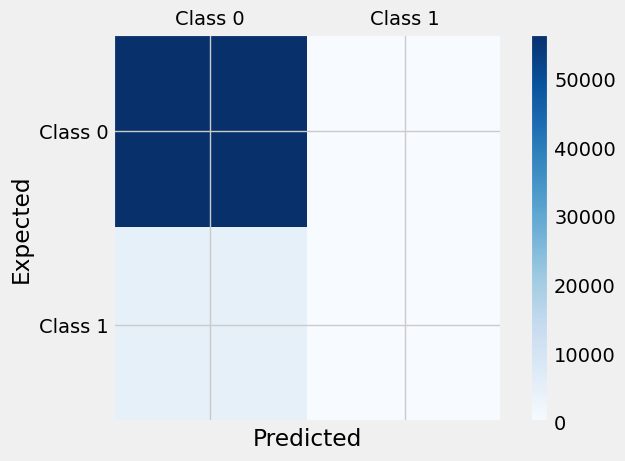

Confusion matrix:
 [[56648     0]
 [ 4855     0]]


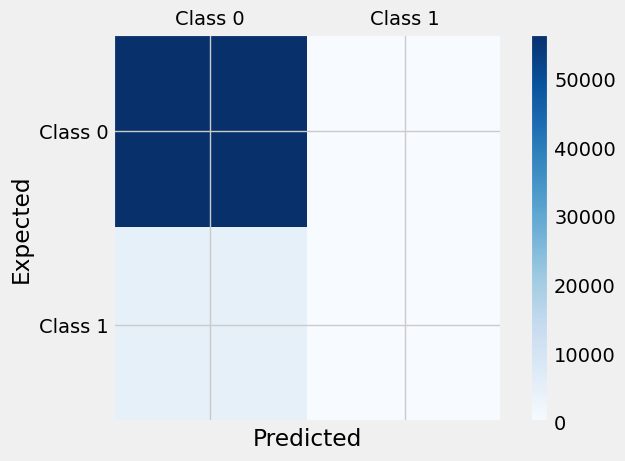

Confusion matrix:
 [[56648     0]
 [ 4855     0]]


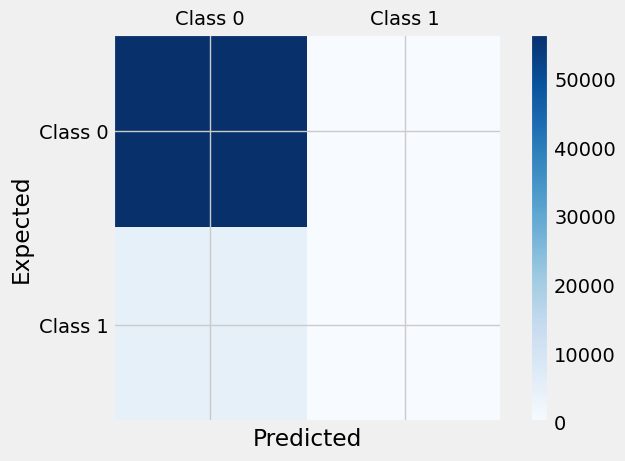

In [64]:
from sklearn.metrics import confusion_matrix

aff_confusion_matrix(df_results_base["y_true"], df_results_base["y_pred_lr_bin"])

aff_confusion_matrix(df_results_base_poly["y_true"], df_results_base_poly["y_pred_lr_poly_bin"])

aff_confusion_matrix(df_results_base_domain["y_true"], df_results_base_domain["y_pred_lr_domain_bin"])

Nous pouvons constater que, comme on pouvait le prévoir, l'accuracy du modèle est excellente, mais cela est dû au fait que le jeu de données est fortement déséquilibré. 

En effet il n'y a pas une seule target = 1 qui ait été trouvé dans ce premier essai.

In [65]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

df_metrics_base = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1_score"], index=["sans_feat_eng", "poly_feat", "domain_feat"])

df_metrics_base["Accuracy"][0] = round(accuracy_score(df_results_base["y_true"], df_results_base.iloc[:, 2]), 2)
df_metrics_base["Precision"][0] = round(precision_score(df_results_base["y_true"], df_results_base.iloc[:, 2]), 2)
df_metrics_base["Recall"][0] = round(recall_score(df_results_base["y_true"], df_results_base.iloc[:, 2]), 2)
df_metrics_base["F1_score"][0] = round(f1_score(df_results_base["y_true"], df_results_base.iloc[:, 2]), 2)

df_metrics_base["Accuracy"][1] = round(accuracy_score(df_results_base_poly["y_true"], df_results_base_poly.iloc[:, 2]), 2)
df_metrics_base["Precision"][1] = round(precision_score(df_results_base_poly["y_true"], df_results_base_poly.iloc[:, 2]), 2)
df_metrics_base["Recall"][1] = round(recall_score(df_results_base_poly["y_true"], df_results_base_poly.iloc[:, 2]), 2)
df_metrics_base["F1_score"][1] = round(f1_score(df_results_base_poly["y_true"], df_results_base_poly.iloc[:, 2]), 2)

df_metrics_base["Accuracy"][2] = round(accuracy_score(df_results_base_domain["y_true"], df_results_base_domain.iloc[:, 2]), 2)
df_metrics_base["Precision"][2] = round(precision_score(df_results_base_domain["y_true"], df_results_base_domain.iloc[:, 2]), 2)
df_metrics_base["Recall"][2] = round(recall_score(df_results_base_domain["y_true"], df_results_base_domain.iloc[:, 2]), 2)
df_metrics_base["F1_score"][2] = round(f1_score(df_results_base_domain["y_true"], df_results_base_domain.iloc[:, 2]), 2)

df_metrics_base

,Accuracy,Precision,Recall,F1_score
sans_feat_eng,0.92,0.0,0.0,0.0
poly_feat,0.92,0.0,0.0,0.0
domain_feat,0.92,0.0,0.0,0.0


Les premiers résultats nous indique que les targets à prédire étants très fortement déséquilibrées, le feature engineering essayé précédemment n'améliore rien du tout. Cela ne veut pas dire qu'il est inutile, mais vu le déséquilibrage des targets nous n'en voyons pas les effets.

Nous allons donc réessayer un faisant un resampling du jeu de données.

# Resampling

Dans le cas de données très déséquilibré comme ici, il existe des techniques de rééchantillonage afin de rééquilibrer ces données.

Exemple : Un jeu de données de 1000 individus, avec 90% de target=0 et 10% de target=1.

Imaginons que le modèle ne prédise que des 0. Il aura une accuracy de 90% au général, mais pour la classe 1 son accuracy sera de 0%. Le modèle ne sera donc pas si performant que ça.

Il existe deux techniques pour resampler les données :
 - L'under sampling : On enlève des individus de la classe majoritaire.
 - L'over sampling : On rajoute des individus dans la classe minoritaire.
 
![image](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png)
 
Et pour chacune de cette technique, il existe plusieurs façon de les mettre en oeuvre. Pour cela nous allons utiliser la librairie imblearn qui regroupe toutes ces techniques de mise en oeuvre...

In [66]:
print("RAPPEL - DESEQUILIBRAGE DES DONNEES")

percent0 = (y_train.value_counts()[0] / y_train.shape) * 100
percent1 = (y_train.value_counts()[1] / y_train.shape) * 100

print("Nombre d'individus pour la classe 0 :", y_train.value_counts()[0], ". Soit", percent0, "% de la population.")
print("Nombre d'individus pour la classe 1 :", y_train.value_counts()[1], ". Soit", percent1, "% de la population.")



RAPPEL - DESEQUILIBRAGE DES DONNEES
Nombre d'individus pour la classe 0 : 226038 . Soit [91.88237781] % de la population.
Nombre d'individus pour la classe 1 : 19970 . Soit [8.11762219] % de la population.


Class 0: 226038
Class 1: 19970
Proportion: 11.32 : 1


([<matplotlib.patches.Wedge at 0x20ddb21bed0>,
 [Text(-0.2774940275746891, -1.0644233484194048, 'Classe 0'),
  Text(0.3027207573542064, 1.1611891073666234, 'Classe 1')],
 [Text(-0.1513603786771031, -0.5805945536833117, '91.9%'),
  Text(0.1765871084566204, 0.6773603126305303, '8.1%')])

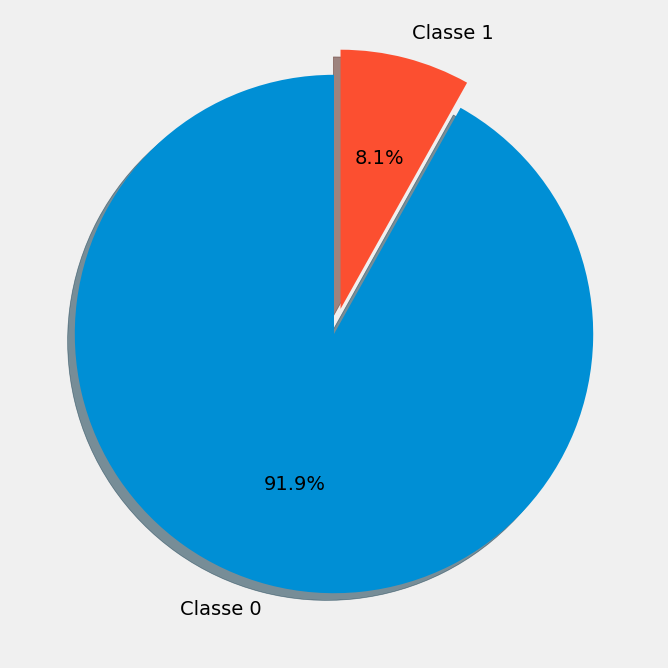

In [67]:
target_count = y_train.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

plt.figure(figsize=(8,8))

plt.pie(target_count, explode=[0, 0.1], labels=["Classe 0", "Classe 1"], autopct='%1.1f%%',
        shadow=True, startangle=90)

__Python imbalanced-learn module__

A number of more sophisticated resapling techniques have been proposed in the scientific literature.

For example, we can cluster the records of the majority class, and do the under-sampling by removing records from each cluster, thus seeking to preserve information. In over-sampling, instead of creating exact copies of the minority class records, we can introduce small variations into those copies, creating more diverse synthetic samples.

Let's apply some of these resampling techniques, using the Python library imbalanced-learn. It is compatible with scikit-learn and is part of scikit-learn-contrib projects.

In [72]:
pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ---------------------------------------- 235.6/235.6 kB 7.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [75]:
pip show imbalanced-learn

Name: imbalanced-learn
Version: 0.11.0
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: C:\Users\Zbook\AppData\Roaming\Python\Python311\site-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [74]:
import imblearn

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

__Over-sampling followed by under-sampling__

We will do a combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques :

<b> - Over-sampling: SMOTE</b>
 
SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

![image](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/smote.png)

<b> - Under-sampling: Tomek links</b>
 
Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

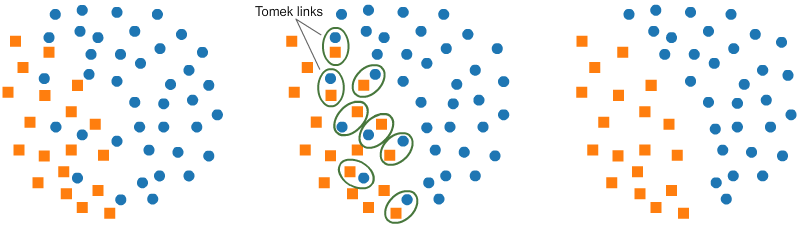

Nous allons relancer notre baseline mais avec des jeux de données rééquilibrés. Nous pourrons ainsi choisir quel feature engineering est le plus efficace ici.

## Sans feature engineering

In [70]:
# On détermine la taille de l'échantillon pour les études
n_sample = 10000

In [71]:
%%time
from imblearn.under_sampling  import RandomUnderSampler
from collections import Counter

#print("Construction echantillonage d'étude")
#X_train_etude = app_train.sample(n_sample)
#y_train_etude = app_train["TARGET"][X_train_etude.index]
#print("Nombre de features après PCA :", X_train_etude.shape[1])

print("Preprocessing")
train, test = preprocesseur(app_train, app_test)

print("Resampling")
smt = RandomUnderSampler()
X_smt, y_smt = smt.fit_resample(train, app_train["TARGET"])

print('Original dataset shape %s' % Counter(app_train["TARGET"]))
print('Resampled dataset shape %s' % Counter(y_smt))


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

## Avec polynomial features

In [58]:
%%time

print("Preprocessing")
train_poly, test_poly = preprocesseur(app_train_poly, app_test_poly)

print("Resampling")
X_smt_poly, y_smt_poly = smt.fit_resample(train_poly, app_train["TARGET"])

print('Original dataset shape %s' % Counter(app_train["TARGET"]))
print('Resampled dataset shape %s' % Counter(y_smt_poly))

Preprocessing
Resampling
Original dataset shape Counter({0: 282686, 1: 24825})
Resampled dataset shape Counter({0: 24825, 1: 24825})
Wall time: 11.6 s


## Avec domain knowledge features

In [59]:
%%time

print("Preprocessing")
train_domain, test_domain = preprocesseur(app_train_domain, app_test_domain)

print("Resampling")
X_smt_domain, y_smt_domain = smt.fit_resample(train_domain, app_train["TARGET"])

print('Original dataset shape %s' % Counter(app_train["TARGET"]))
print('Resampled dataset shape %s' % Counter(y_smt_domain))

Preprocessing
Resampling
Original dataset shape Counter({0: 282686, 1: 24825})
Resampled dataset shape Counter({0: 24825, 1: 24825})
Wall time: 9.35 s


Class 0: 24825
Class 1: 24825
Proportion: 1.0 : 1


([<matplotlib.patches.Wedge at 0x190592cfc88>,
 [Text(-1.1, 1.3471114790620887e-16, 'Classe 0'),
  Text(1.2000000000000002, -2.939152317953648e-16, 'Classe 1')],
 [Text(-0.6, 7.347880794884119e-17, '50.0%'),
  Text(0.7, -1.7145055188062944e-16, '50.0%')])

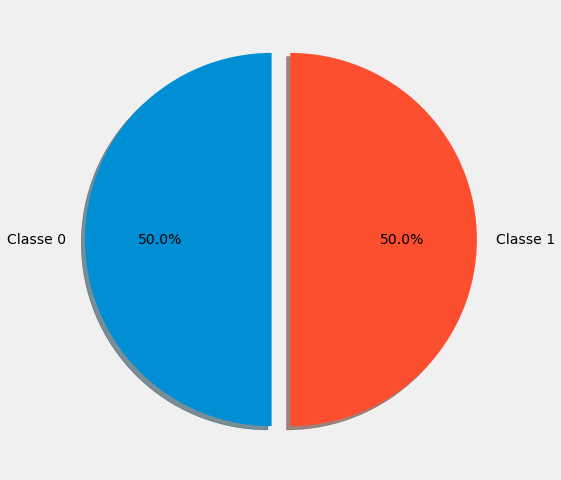

In [60]:
target_count = y_smt.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

plt.figure(figsize=(8,8))

plt.pie(target_count, explode=[0, 0.1], labels=["Classe 0", "Classe 1"], autopct='%1.1f%%',
        shadow=True, startangle=90)

## Analyse de la baseline

Nous allons relancer notre régression logistique avec des jeux de données rééquilibrés afin de voir quelle itération est la plus efficace.

In [61]:
# On crée le dataframe de résultats
df_results_base = pd.DataFrame(y_test.values, columns=["y_true"], index=y_test.index)

# On lance les prédictions
log_reg_pred = log_reg(X_smt, y_smt, y_test, X_test)

# On enregistre les résultats
df_results_base = save_results(df_results_base, log_reg_pred, "y_pred_lr", y_test)

# On "binarise" les probabilités avec un treshold parametré à 0.5
# Par exemple, pour un treshold de 0.5, si la probabilité en est inférieure la valeur sera de 0. Sinon elle sera de 1.
# Et on concatène les données à notre tableau de résultats
df_results_base["y_pred_lr_bin"] = transform_treshold(df_results_base["y_pred_lr"], 0.5)

display(df_results_base.head())
print(df_results_base.shape)

Accuracy: 60.91%


,y_true,y_pred_lr,y_pred_lr_bin
42962,1,0.520246,1
227307,0,0.438372,0
290035,0,0.447173,0
239833,0,0.556505,1
76427,0,0.532376,1


(61503, 3)


In [62]:
# On crée le dataframe de résultats
df_results_base_poly = pd.DataFrame(y_test_poly.values, columns=["y_true"], index=y_test_poly.index)

# On lance les prédictions
log_reg_pred = log_reg(X_smt_poly, y_smt_poly, y_test_poly, X_test_poly)

# On enregistre les résultats
df_results_base_poly = save_results(df_results_base_poly, log_reg_pred, "y_pred_lr_poly", y_test_poly)

# On "binarise" les probabilités avec un treshold parametré à 0.5
# Par exemple, pour un treshold de 0.5, si la probabilité en est inférieure la valeur sera de 0. Sinon elle sera de 1.
# Et on concatène les données à notre tableau de résultats
df_results_base_poly["y_pred_lr_poly_bin"] = transform_treshold(df_results_base_poly["y_pred_lr_poly"], 0.5)

display(df_results_base_poly.head())
print(df_results_base_poly.shape)

Accuracy: 64.71%


,y_true,y_pred_lr_poly,y_pred_lr_poly_bin
42962,1,0.592390,1
227307,0,0.342850,0
290035,0,0.500098,1
239833,0,0.526761,1
76427,0,0.600559,1


(61503, 3)


In [63]:
# On crée le dataframe de résultats
df_results_base_domain = pd.DataFrame(y_test_domain.values, columns=["y_true"], index=y_test_domain.index)

# On lance les prédictions
log_reg_pred = log_reg(X_smt_domain, y_smt_domain, y_test_domain, X_test_domain)

# On enregistre les résultats
df_results_base_domain = save_results(df_results_base_domain, log_reg_pred, "y_pred_lr_domain", y_test_domain)

# On "binarise" les probabilités avec un treshold parametré à 0.5
# Par exemple, pour un treshold de 0.5, si la probabilité en est inférieure la valeur sera de 0. Sinon elle sera de 1.
# Et on concatène les données à notre tableau de résultats
df_results_base_domain["y_pred_lr_domain_bin"] = transform_treshold(df_results_base_domain["y_pred_lr_domain"], 0.5)

display(df_results_base_domain.head())
print(df_results_base_domain.shape)

Accuracy: 61.37%


,y_true,y_pred_lr_domain,y_pred_lr_domain_bin
42962,1,0.521393,1
227307,0,0.438001,0
290035,0,0.447465,0
239833,0,0.554949,1
76427,0,0.528788,1


(61503, 3)


Confusion matrix:
 [[34342 22306]
 [ 1735  3120]]


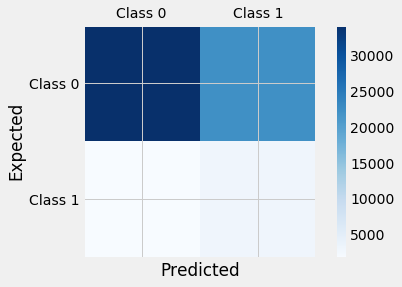

Confusion matrix:
 [[36461 20187]
 [ 1515  3340]]


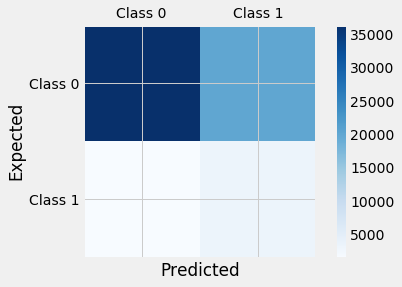

Confusion matrix:
 [[34628 22020]
 [ 1739  3116]]


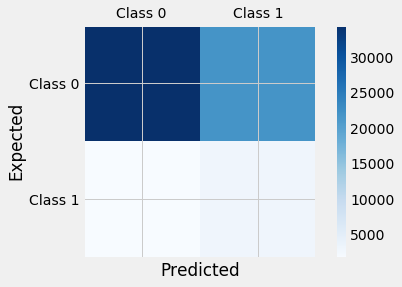

In [64]:
aff_confusion_matrix(df_results_base["y_true"], df_results_base["y_pred_lr_bin"])

aff_confusion_matrix(df_results_base_poly["y_true"], df_results_base_poly["y_pred_lr_poly_bin"])

aff_confusion_matrix(df_results_base_domain["y_true"], df_results_base_domain["y_pred_lr_domain_bin"])

In [65]:
df_metrics_base = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1_score"], index=["sans_feat_eng", "poly_feat", "domain_feat"])

df_metrics_base["Accuracy"][0] = round(accuracy_score(df_results_base["y_true"], df_results_base.iloc[:, 2]), 2)
df_metrics_base["Precision"][0] = round(precision_score(df_results_base["y_true"], df_results_base.iloc[:, 2]), 2)
df_metrics_base["Recall"][0] = round(recall_score(df_results_base["y_true"], df_results_base.iloc[:, 2]), 2)
df_metrics_base["F1_score"][0] = round(f1_score(df_results_base["y_true"], df_results_base.iloc[:, 2]), 2)

df_metrics_base["Accuracy"][1] = round(accuracy_score(df_results_base_poly["y_true"], df_results_base_poly.iloc[:, 2]), 2)
df_metrics_base["Precision"][1] = round(precision_score(df_results_base_poly["y_true"], df_results_base_poly.iloc[:, 2]), 2)
df_metrics_base["Recall"][1] = round(recall_score(df_results_base_poly["y_true"], df_results_base_poly.iloc[:, 2]), 2)
df_metrics_base["F1_score"][1] = round(f1_score(df_results_base_poly["y_true"], df_results_base_poly.iloc[:, 2]), 2)

df_metrics_base["Accuracy"][2] = round(accuracy_score(df_results_base_domain["y_true"], df_results_base_domain.iloc[:, 2]), 2)
df_metrics_base["Precision"][2] = round(precision_score(df_results_base_domain["y_true"], df_results_base_domain.iloc[:, 2]), 2)
df_metrics_base["Recall"][2] = round(recall_score(df_results_base_domain["y_true"], df_results_base_domain.iloc[:, 2]), 2)
df_metrics_base["F1_score"][2] = round(f1_score(df_results_base_domain["y_true"], df_results_base_domain.iloc[:, 2]), 2)

df_metrics_base

,Accuracy,Precision,Recall,F1_score
sans_feat_eng,0.61,0.12,0.64,0.21
poly_feat,0.65,0.14,0.69,0.24
domain_feat,0.61,0.12,0.64,0.21


## Conclusion sur features engineering

Nous pouvons constater au vu des derniers résultats précédents, que le features engineering utilisant le polynomial features s'avère le plus performant ici. Et ce, dans toutes les métriques mesurées.

Nous allons maintenant pouvoir tester d'autres modèles de classifieurs, avec optimisation RandomizeSearchCV.

# Mise en place et optimisation de modèles

Nous allons entraîner plusieurs modèles sur un échantillon de 10000 lignes avant resampling et choisir le plus performant.

Le resampling étant une tâche assez lourde en temps de calcul et le randomizedsearchCV aussi, nous devons réduire considérablement notre jeu de données pour cette étape.

Nous allons mesurer à chaque fois :
 - le taux de TP, TN, FP, FN
 - la précision
 - le recall
 - le Fi
 - l'accuracy
 

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
import xgboost as xgb

from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

Nous créons un dataframe de résultats sur la base du feature engineering polynomial

In [67]:
df_results = pd.DataFrame(y_test_domain.values, columns=["y_true"], index=y_test_domain.index)

## Régression logistique

In [68]:
%%time

# Make the model with the specified regularization parameter
clf_lr = LogisticRegression(C=10)

# Train on the training data
clf_lr.fit(X_smt_domain, y_smt_domain)

# Make predictions
# Make sure to select the second column only
lr_pred_smoted = clf_lr.predict_proba(X_test_domain)[:, 1]

# Submission dataframe
df_results["y_pred_lr_smoted"] = lr_pred_smoted

df_results.head()

Wall time: 2.19 s


,y_true,y_pred_lr_smoted
42962,1,0.805932
227307,0,0.257103
290035,0,0.484028
239833,0,0.342918
76427,0,0.784176


Une fois que les probabilités de chaque ligne ont été ajoutées au tableau, nous allons les transformer en binaire avec la fonction treshold.

Nous allons paramétrer le treshold sur 0.5.

In [69]:
df_results["y_pred_lr_smoted_bin"] = transform_treshold(df_results["y_pred_lr_smoted"], 0.5)

df_results.head()

,y_true,y_pred_lr_smoted,y_pred_lr_smoted_bin
42962,1,0.805932,1
227307,0,0.257103,0
290035,0,0.484028,0
239833,0,0.342918,0
76427,0,0.784176,1


## Random Forest

In [70]:
%%time

# Make the model with the specified regularization parameter
clf_rf = RandomForestClassifier(n_estimators=1000,
                                max_depth=10
                               )

# Train on the training data
clf_rf.fit(X_smt_domain, y_smt_domain)

# Make predictions
# Make sure to select the second column only
rf_pred_smoted = clf_rf.predict_proba(X_test_domain)[:, 1]

# Submission dataframe
df_results["y_pred_rf_smoted"] = rf_pred_smoted

df_results.head()

Wall time: 1min 33s


,y_true,y_pred_lr_smoted,y_pred_lr_smoted_bin,y_pred_rf_smoted
42962,1,0.805932,1,0.646846
227307,0,0.257103,0,0.236119
290035,0,0.484028,0,0.431756
239833,0,0.342918,0,0.414303
76427,0,0.784176,1,0.600200


In [71]:
df_results["y_pred_rf_smoted_bin"] = transform_treshold(df_results["y_pred_rf_smoted"], 0.5)

df_results.head()

,y_true,y_pred_lr_smoted,y_pred_lr_smoted_bin,y_pred_rf_smoted,y_pred_rf_smoted_bin
42962,1,0.805932,1,0.646846,1
227307,0,0.257103,0,0.236119,0
290035,0,0.484028,0,0.431756,0
239833,0,0.342918,0,0.414303,0
76427,0,0.784176,1,0.600200,1


## XGBoost

In [72]:
clf_xgb = xgb.XGBClassifier(objective="binary:logistic",
                            random_state=0)

clf_xgb.fit(X_smt_domain, y_smt_domain)

# Make predictions
# Make sure to select the second column only
xgb_pred_smoted = clf_xgb.predict_proba(X_test_domain)[:, 1]

# Submission dataframe
df_results["y_pred_xgb_smoted"] = xgb_pred_smoted
    
df_results.head()


,y_true,y_pred_lr_smoted,y_pred_lr_smoted_bin,y_pred_rf_smoted,y_pred_rf_smoted_bin,y_pred_xgb_smoted
42962,1,0.805932,1,0.646846,1,0.783394
227307,0,0.257103,0,0.236119,0,0.255634
290035,0,0.484028,0,0.431756,0,0.434205
239833,0,0.342918,0,0.414303,0,0.326832
76427,0,0.784176,1,0.600200,1,0.809324


In [73]:
df_results["y_pred_xgb_smoted_bin"] = transform_treshold(df_results["y_pred_xgb_smoted"], 0.5)

df_results.head()

,y_true,y_pred_lr_smoted,y_pred_lr_smoted_bin,y_pred_rf_smoted,y_pred_rf_smoted_bin,y_pred_xgb_smoted,y_pred_xgb_smoted_bin
42962,1,0.805932,1,0.646846,1,0.783394,1
227307,0,0.257103,0,0.236119,0,0.255634,0
290035,0,0.484028,0,0.431756,0,0.434205,0
239833,0,0.342918,0,0.414303,0,0.326832,0
76427,0,0.784176,1,0.600200,1,0.809324,1


## Gradient Boosting Classifier

In [ ]:
%%time

# Create the model
clf_lgb = lgb.LGBMClassifier(n_estimators=10000,
                             objective='binary',
                             class_weight='balanced',
                             learning_rate=0.05,
                             reg_alpha=0.1,
                             reg_lambda=0.1,
                             subsample=0.8,
                             n_jobs=-1,
                             random_state=0
                            )

# Train on the training data
clf_lgb.fit(X_smt_poly, y_smt_poly)

# Make predictions
# Make sure to select the second column only
lgb_pred_smoted = clf_lgb.predict_proba(X_test_poly)[:, 1]

# Submission dataframe
df_results["y_pred_lgb_smoted"] = lgb_pred_smoted
    
df_results.head()

In [ ]:
df_results["y_pred_lgb_smoted_bin"] = transform_treshold(df_results["y_pred_lgb_smoted"], 0.5)

df_results.head()

## Analyse des résultats

### Matrice de confusion

Analysons la matrice de confusion de chaque modèle pour visualiser le nombre de TN, FN, TP, FN.

Matrice confusion régression logistique
Confusion matrix:
 [[38805 17843]
 [ 1529  3326]]


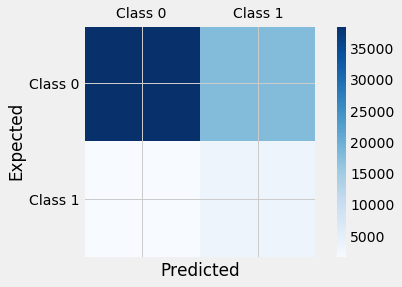

Matrice confusion random forest
Confusion matrix:
 [[38647 18001]
 [ 1197  3658]]


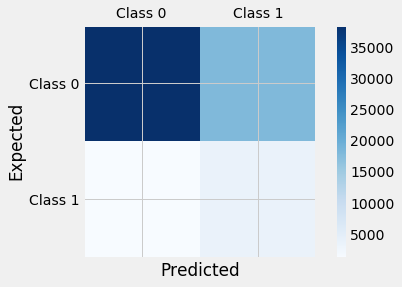

Matrice confusion XGBoost
Confusion matrix:
 [[39287 17361]
 [ 1447  3408]]


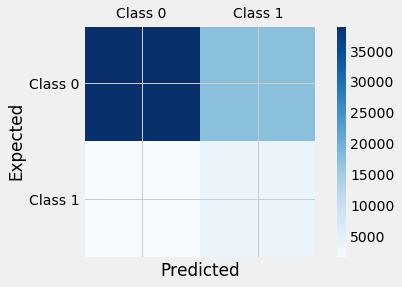

In [74]:
print("Matrice confusion régression logistique")
aff_confusion_matrix(df_results["y_true"], df_results["y_pred_lr_smoted_bin"])

print("Matrice confusion random forest")
aff_confusion_matrix(df_results["y_true"], df_results["y_pred_rf_smoted_bin"])

#print("Matrice confusion LGBMClassifier")
#aff_confusion_matrix(df_results["y_true"], df_results["y_pred_lgb_smoted_bin"])

print("Matrice confusion XGBoost")
aff_confusion_matrix(df_results["y_true"], df_results["y_pred_xgb_smoted_bin"])

## Accuracy, Precision, Recall, F1 score

Nous allons mesurer différentes métriques pour bine comprendre les classifieurs :

 - L'accuracy : Nous avons vu ici que l'accuracy ne signifait pas grand chose.
 - La précision : Ce coefficient détermine que, quand le classifieur déclare que la prédiction est un 1, il a raison à X%.
 - Le rappel : Ce coefficient détermine le pourcentage de détection des 1 du classifieur.
 - Le F1-score : Ce coefficient est une moyenne de la précision et du rappel, mais, de part sa formule il donne plus de poids aux faibles valeurs.

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

nb_models = 3

df_metrics = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1_score"], index=["Logistic regression", "Random Forest", "XGBoost"])

# j=3 représente la 3eme colonne du dataframe df_results
# on cible les colonnes de valeurs prédites avec cette variable
j = 2

for i in np.arange(0, nb_models):
    
    df_metrics["Accuracy"][i] = round(accuracy_score(df_results["y_true"], df_results.iloc[:, j]), 2)
    df_metrics["Precision"][i] = round(precision_score(df_results["y_true"], df_results.iloc[:, j]), 2)
    df_metrics["Recall"][i] = round(recall_score(df_results["y_true"], df_results.iloc[:, j]), 2)
    df_metrics["F1_score"][i] = round(f1_score(df_results["y_true"], df_results.iloc[:, j]), 2)
    
    j += 2

df_metrics

,Accuracy,Precision,Recall,F1_score
Logistic regression,0.69,0.16,0.69,0.26
Random Forest,0.69,0.17,0.75,0.28
XGBoost,0.69,0.16,0.7,0.27


## Courbe Receiver Operating Characteristic (ROC) et Area Under the Curve (AUC)

La courbe ROC est un outil communément utilisé avec les classifieurs binaires. Elle croise le taux de TP avec le taux de FP. Le taux de FP est le pourcentage d'observations négatives qui sont incorrectement classées comme positives. Il est égal à 1 moins le taux de TN, qui est le pourcentage d'observations négatives qui sont correctement classées comme négatives. Le taux de FN est aussi appelé <i>spécificité</i>. Par conséquent la courbe ROC croise <i>sensibilité</i> (ou rappel) et 1-spécificité.

La meilleure courbe ROC, est celle qui passe le plus dans le coin supérieur gauche du graphique.

Le score AUC est une façon de comparer des classificateurs. Un classificateur parfait aurait une aire sous la courbe ROC égale à 1, tandis qu'un classificateur purement aléatoire aurait une ROC AUC de 0.5.

In [76]:
from sklearn.metrics import roc_curve

fp_lr, tp_lr, treshold_lr = roc_curve(y_test_domain, lr_pred_smoted)
fp_rf, tp_rf, treshold_rf = roc_curve(y_test_domain, rf_pred_smoted)
#fp_lgb, tp_lgb, treshold_lgb = roc_curve(y_test_poly, lgb_pred_smoted)
fp_xgb, tp_xgb, treshold_xgb = roc_curve(y_test_domain, xgb_pred_smoted)

In [77]:
from sklearn.metrics import roc_auc_score

auc_score_lr = roc_auc_score(y_test_domain, lr_pred_smoted)
auc_score_rf = roc_auc_score(y_test_domain, rf_pred_smoted)
#auc_score_lgb = roc_auc_score(y_test_poly, lgb_pred_smoted)
auc_score_xgb = roc_auc_score(y_test_domain, xgb_pred_smoted)

lst_auc_score = [("Logistic Regression", auc_score_lr),
                ("Random Forest", auc_score_rf),
                #("LGBMClassifier", auc_score_lgb),
                ("XGBoost", auc_score_xgb)]

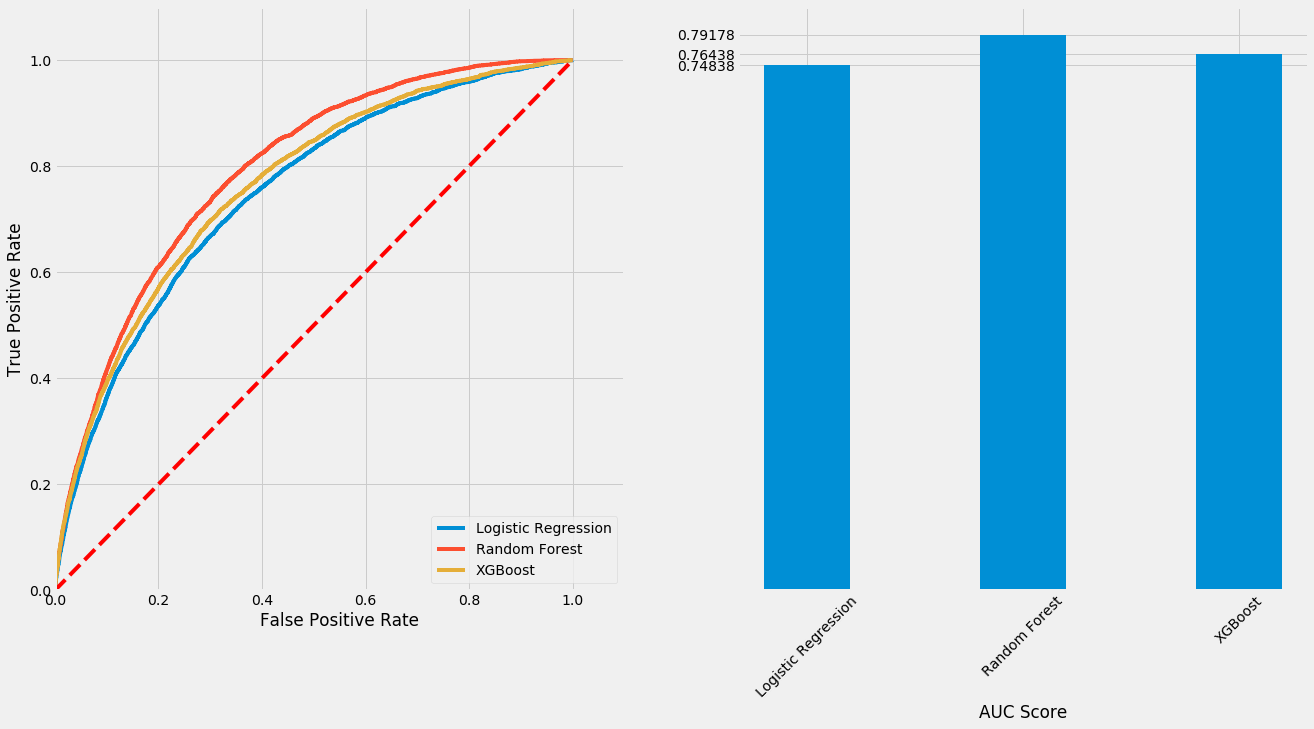

In [78]:
plt.figure(figsize=(20,10))


plt.subplot(1, 2, 1)

plt.plot(fp_lr, tp_lr, label="Logistic Regression")
plt.plot(fp_rf, tp_rf, label="Random Forest")
#plt.plot(fp_lgb, tp_lgb, label="LGBMClassifier")
plt.plot(fp_xgb, tp_xgb, label="XGBoost")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


plt.subplot(1, 2, 2)

plt.style.use('fivethirtyeight')

labels, ys = zip(*lst_auc_score)

xs = np.arange(len(labels)) 

width = 0.4

plt.bar(xs, ys, width, align='center')

plt.xlabel("AUC Score")
plt.xticks(xs, labels, rotation=45) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)
plt.show()

In [79]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

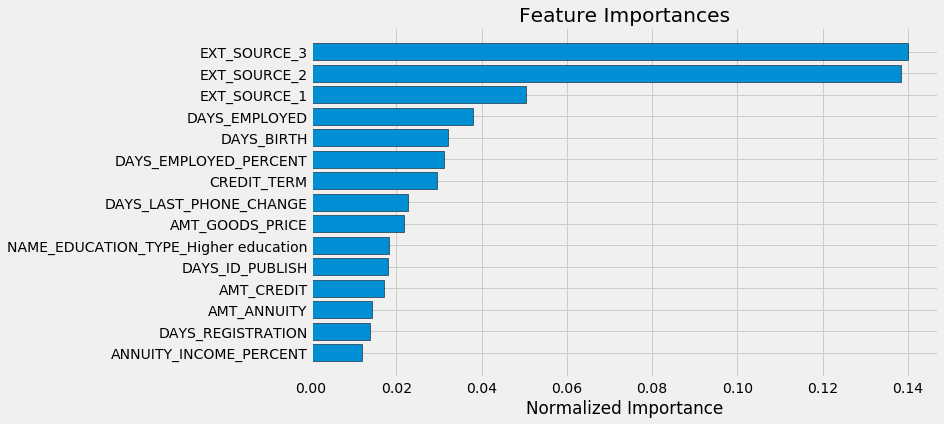

In [80]:
# Make the feature importance dataframe
feature_importances = pd.DataFrame({'feature': app_test_domain.columns, 'importance': clf_rf.feature_importances_})

fi_sorted = plot_feature_importances(feature_importances)

## Conclusion sur modeling

Le gradient boosting Classifier donne d'excellents résultats, pour ainsi dire parfait.

Compte tenu de son score AUC qui approche de la perfection, la matrice de confusion nous indique que le modèle ne prédit pas de FN.

Nous allons maintenant nous concentrer sur le dashboard et les informations utiles à afficher pour le client.

Une fois que nous avons identifié les meilleures itérations de nos modèles, le mieux est de les entraîner sur un échantillon plus gros que précédemment. Nous allons donc relancer un preprocessing avec un échantillon plus conséquent et faire tourner nos modèles avec la meilleure itération trouvée précédemment.

In [82]:
import streamlit as st

In [83]:
st.title("test")

In [84]:
st.write("test")